In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import joblib
import numpy as np

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
df.head()

,price_in_eur,price_per_sq_meter,size_sq_meter,number_of_rooms,location,area
0,435000,3452,126,4,ZORANA ĐINĐIĆA,Blok 25 Arena
1,58000,1415,41,1,BULEVAR REVOLUCIJE,Kaluđerica
2,469000,2759,170,4,ŽARKA VUKOVIĆA PUCARA,Golf Naselje
3,162000,1459,111,3,DRAGAČEVSKA,Šumice
4,155000,1722,90,3,RADE KONČARA ZEMUN,Meandri


In [4]:
#We imported excel file in which we alredy did cleaning process
len(df)

1740

In [5]:
#Check if all columns imported right and present
df.columns

Index(['price_in_eur', 'price_per_sq_meter', 'size_sq_meter',
       'number_of_rooms', 'location', 'area'],
      dtype='object')

In [6]:
#Check if there are null values
print(df.isnull().sum())

price_in_eur          0
price_per_sq_meter    0
size_sq_meter         0
number_of_rooms       0
location              0
area                  0
dtype: int64


We already did analysis with Tableau so here next five cells you use if you do not have Tableau or PowerBI and want to analyse in notebook

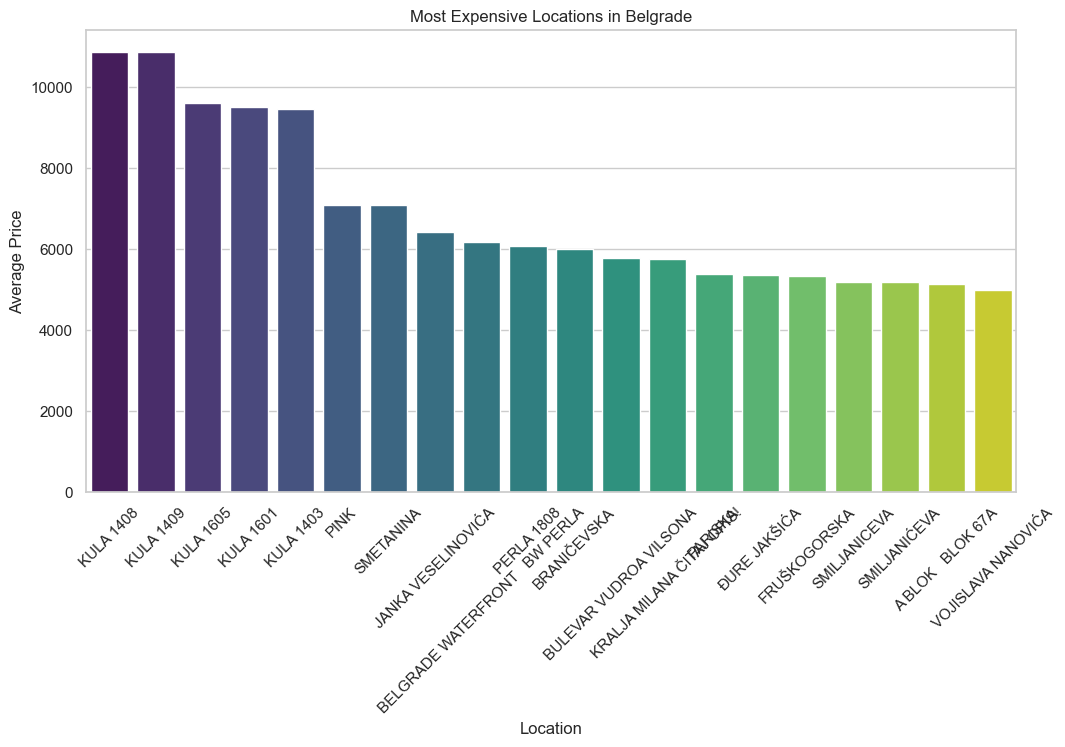

In [7]:
#Simulate Tableu graph called "Most expensive locations in Belgrade"


average_price_per_location = df.groupby('location')['price_per_sq_meter'].mean()
average_price_per_location = average_price_per_location.sort_values(ascending=False)
top_20_locations = average_price_per_location.head(20)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_locations.index, y=top_20_locations.values, palette="viridis")
plt.title('Most Expensive Locations in Belgrade')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

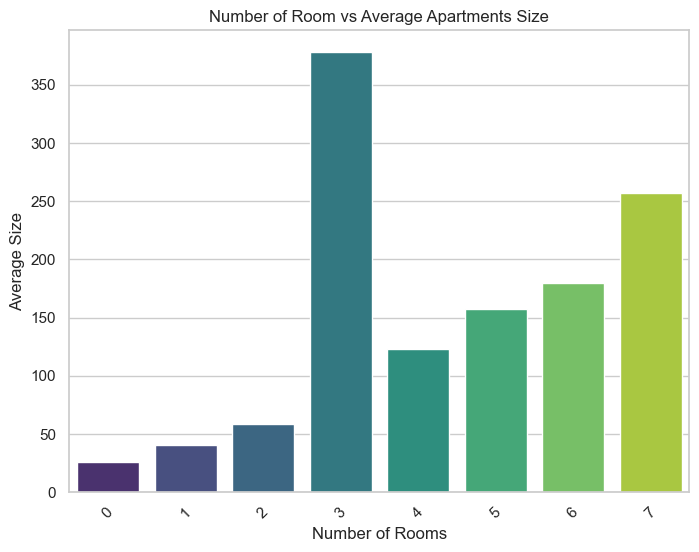

In [8]:
filtered_df = df[df['location'] != 'centralno']
average_size_vs_rooms = filtered_df[filtered_df['number_of_rooms'] != 'centralno'].groupby('number_of_rooms')['size_sq_meter'].mean().reset_index()

# Sort the data by number_of_rooms in descending order
average_size_vs_rooms = average_size_vs_rooms.sort_values('number_of_rooms', ascending=True)

# Plot the data using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='number_of_rooms', y='size_sq_meter', data=average_size_vs_rooms.head(20), palette='viridis')

# Set the chart title and labels
plt.title('Number of Room vs Average Apartments Size')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Size')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

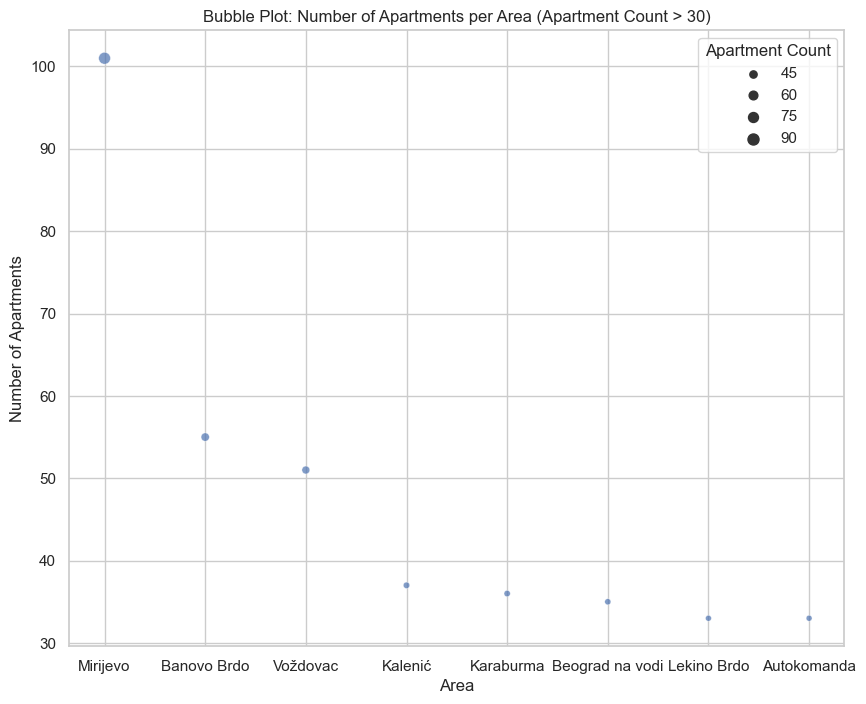

In [9]:
#There is no bubble plot in seaborn as it is in Tableu so we simulate it b making size of marker = number of apartments in that particular area

# Calculate the count of apartments per area
apartment_counts = df['area'].value_counts().reset_index()
apartment_counts.columns = ['area', 'Apartment Count']

# Filter areas with more than 30 apartments
filtered_counts = apartment_counts[apartment_counts['Apartment Count'] > 30]

# Plot the bubble chart using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='area', y='Apartment Count', size='Apartment Count', data=filtered_counts, alpha=0.7)

# Set the chart title and labels
plt.title('Bubble Plot: Number of Apartments per Area (Apartment Count > 30)')
plt.xlabel('Area')
plt.ylabel('Number of Apartments')

# Show the chart
plt.show()

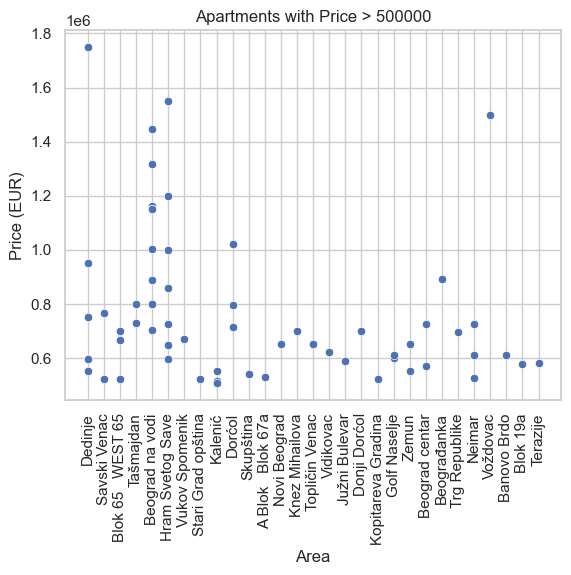

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for apartments with price > 500000
filtered_data = df[df['price_in_eur'] > 500000]

# Filter the data for apartments with price_in_eur > 500000
high_price_data = filtered_data[filtered_data['price_in_eur'] > 500000]

# Create the scatter plot
sns.scatterplot(data=high_price_data, x='area', y='price_in_eur')

# Set the labels and title
plt.xlabel('Area')
plt.ylabel('Price (EUR)')
plt.title('Apartments with Price > 500000')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [11]:
df.describe()

,price_in_eur,price_per_sq_meter,size_sq_meter,number_of_rooms
count,1.740000e+03,1740.000000,1740.000000,1740.000000
mean,1.996052e+05,2657.447126,159.548276,2.458621
std,1.592006e+05,1036.816077,3594.443933,1.112432
min,1.750000e+03,1.000000,14.000000,0.000000
25%,1.100000e+05,1997.250000,49.000000,2.000000
50%,1.580000e+05,2500.000000,64.000000,2.000000
75%,2.400000e+05,3103.750000,85.000000,3.000000
max,1.750000e+06,10867.000000,150000.000000,7.000000


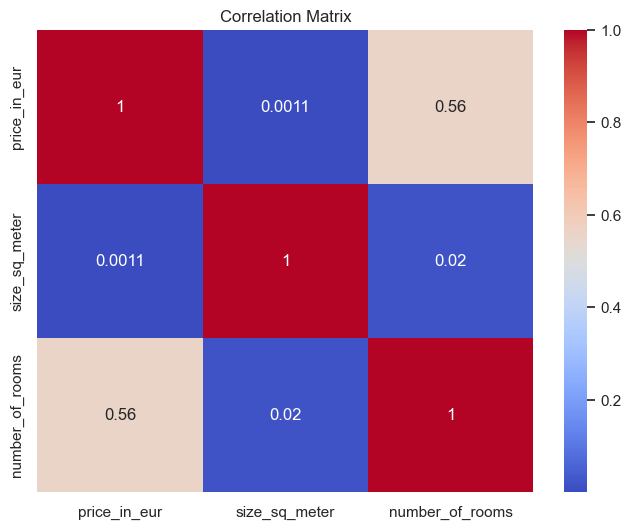

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to exclude rows with unexpected values in the 'area' column
filtered_df = df[~df['area'].isin(['centralno'])]

# Select the relevant columns for correlation analysis
columns = ['price_in_eur', 'size_sq_meter', 'number_of_rooms']

# Convert the selected columns to numeric data types
filtered_df[columns] = filtered_df[columns].apply(pd.to_numeric)

# Compute the correlation matrix
correlation_matrix = filtered_df[columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Display the plot
plt.show()

#We see that biggest corelation is between number of rooms and price in eur

<Axes: xlabel='price_in_eur', ylabel='Count'>

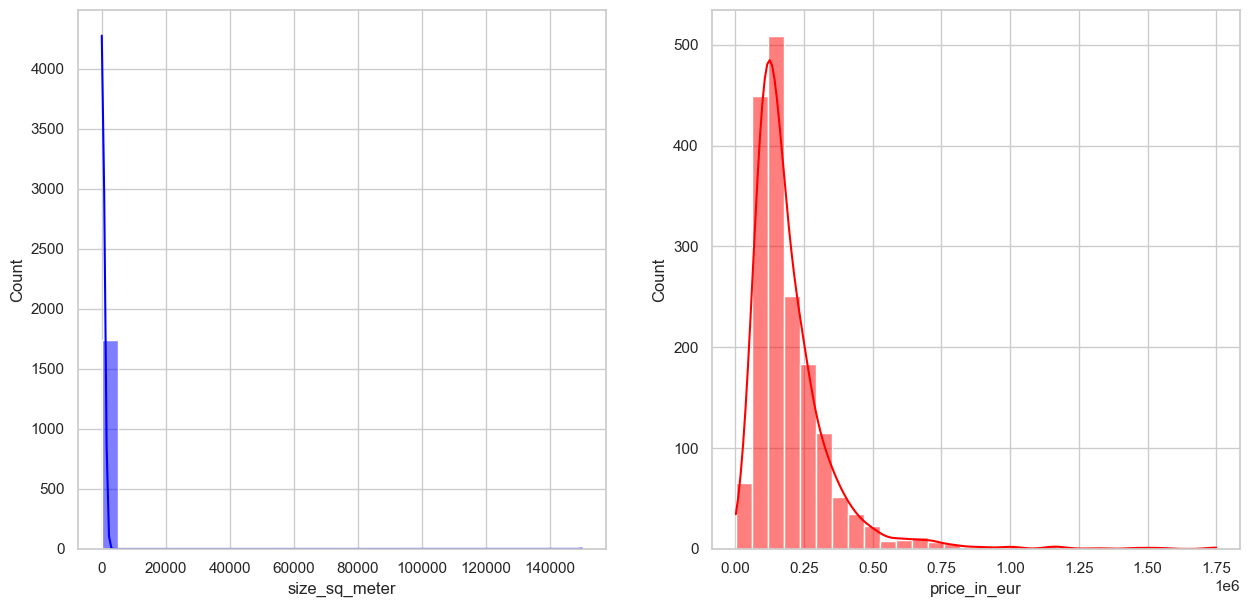

In [13]:
#Check distribution of size_sq_meter column and price_in_eur
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df["size_sq_meter"],bins=30,kde=True,color="blue")
plt.subplot(122)
sns.histplot(data=df,x=df["price_in_eur"],bins=30,kde=True,color="red")

#Both distributions looks right skewed and distribution of size_sq_meter has outliers
#Next we confirm distribution with skew test
#Than we eliminate outliers before our model training

In [14]:
#We are using skew test to confirm distributions
col = ['price_in_eur', 'size_sq_meter']
for i in col: 
    skewness = skew(df["size_sq_meter"])
    if skewness>0:
        print(f"Distribution of {i} data is right-skewed")
    else:
        print(f"Distribution of {i} is left-skewed")

Distribution of price_in_eur data is right-skewed
Distribution of size_sq_meter data is right-skewed


<Axes: ylabel='price_in_eur'>

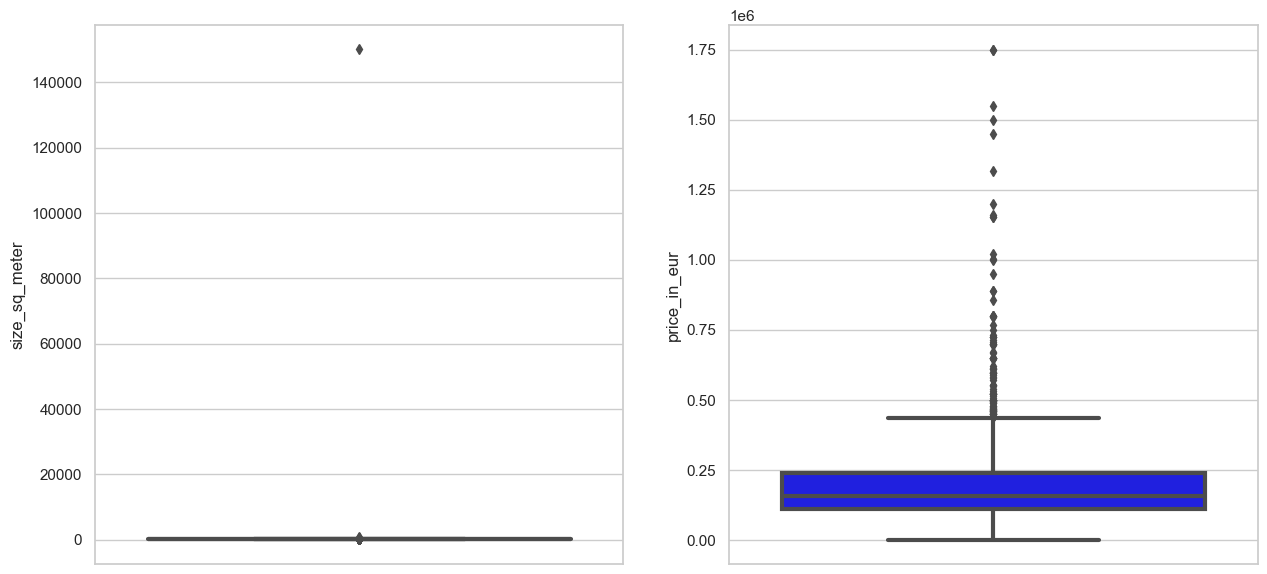

In [15]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.boxplot(data=df,y='size_sq_meter',color='blue',linewidth=3)
plt.subplot(122)
sns.boxplot(data=df,y='price_in_eur',color='blue',linewidth=3)

#We see there are outliers in both group of data
#Regarding size_in_sq_meter we will dropt outlier using quintile rule (Q1=0.25 AND Q3=0.75) that becuase it is not representative for our model
#Regarding price we will not discard all apartments above Q3 becuase curenttly due to inflation there are a lot of aprtments with price higher than 250000 euros (Q3 from descrive table) we will drop prices higher than 1 milion euros to reduce their influence on our model

In [16]:
#First we drop outliers based on size_sq_meter data for those apartments
Q1 = df["size_sq_meter"].quantile(0.25)
Q3 = df["size_sq_meter"].quantile(0.75)
IQR = Q3-Q1
outliers = df[(df["size_sq_meter"]>(1.5*IQR)+Q3) | (df["size_sq_meter"]<Q1-(1.5*IQR))]
df1 = df.drop(outliers.index)

In [17]:
#Now we drop all rows where price of the apartment is greater than 1000000 euros
df1 = df1[df1["price_in_eur"] <= 1000000]

In [18]:
#before prepearing data and splitting them to X and y we need to convert column number_of_rooms from int64 to object so later we can do OneHotEncoding
df1['number_of_rooms'] = df1['number_of_rooms'].astype('object')

In [19]:
df1 = pd.get_dummies(df1,columns=["number_of_rooms","location","area"],drop_first=True)

In [20]:
df1.head()

,price_in_eur,price_per_sq_meter,size_sq_meter,number_of_rooms_1,number_of_rooms_2,number_of_rooms_3,number_of_rooms_4,number_of_rooms_5,number_of_rooms_6,location_11.KRAJIŠKE DIVIZIJE,...,area_Zvezdarska Šuma,area_Ćalije,area_Ćukovac,area_Čubura,area_Čukarica,area_Čukarička Padina,area_Đeram,area_Šumice,area_Žarkovo,area_Železnik
0,435000,3452,126,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,58000,1415,41,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,162000,1459,111,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,155000,1722,90,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,310000,3605,86,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#Regarding that column price per sq feet is product of columns price_in_eur and size_sq_meter to avoid multicollinearit we will drop them and keep only price_per_sq_meter that will be our dependent variable data
X = df1.drop(columns=['price_in_eur','size_sq_meter','price_per_sq_meter',],axis=1)
y = df1['price_per_sq_meter']

- Optional instead of pd get dummies you can do preprocessing using OneHotEncoding from sklearn and create preprocessing pipe

Before Pipe Creation we separate our columns to numerical and categorical, in our case all columns in X are categorical so we can only use OneHotEncoding here but you can use this code in other cases when in X you have both numerical and categorical data and that would be the case more often

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

- Create preprocessor using ColumnTransformer

num_feat_transformer = StandardScaler()
cat_feat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_feat_transformer, cat_features),
         ("StandardScaler", num_feat_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train.shape, X_test.shape

((1470, 1023), (164, 1023))

In [ ]:
best_model = find_best_model_using_randomizedsearchcv(X, y)
joblib.dump(best_model, 'best_model.pkl')

In [24]:
def find_best_model_using_randomizedsearchcv(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': np.arange(0.1, 1.1, 0.1),
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.arange(100, 1000, 100),
                'max_depth': np.arange(5, 20, 5)
            }
        },
        'svm': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf'],
                'C': np.logspace(-3, 3, 7),
                'gamma': ['scale', 'auto']
            }
        }
    }

    best_model = None
    best_score = -float('inf')
    cv = 5
    n_iter = 50  # Number of parameter settings to sample
    for model_name, model_config in models.items():
        rs = RandomizedSearchCV(model_config['model'], model_config['params'], cv=cv, scoring='r2', n_iter=n_iter, n_jobs=-1)
        rs.fit(X, y)
        if rs.best_score_ > best_score:
            best_score = rs.best_score_
            best_model = rs.best_estimator_

    return best_model


In [ ]:
best_model = find_best_model_using_randomizedsearchcv(X, y)
joblib.dump(best_model, 'best_model.pkl')